<a href="https://colab.research.google.com/github/SRIHARITHUNGA/machine-learning/blob/main/H%26S_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Head & Shoulder Shampoo Reviews Data Set

In [508]:
import numpy as np 
import pandas as pd 


from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [509]:
#load the data 
data_raw =pd.read_csv("/content/H_D_Reviews (2).csv")
data_raw.head()

,Ratings,Review
0,4,"Product is good, silky smooth hairIssue with p..."
1,4,NaN
2,4,Maine ise 328 me liya great indian sale me
3,4,NaN
4,4,good product


In [510]:
data_raw["Ratings"].value_counts()

5    1295
1     479
4     421
3     160
2      94
Name: Ratings, dtype: int64

In [511]:
data_raw.dropna(inplace=True, axis=0)

In [512]:
data_raw.head()

,Ratings,Review
0,4,"Product is good, silky smooth hairIssue with p..."
2,4,Maine ise 328 me liya great indian sale me
4,4,good product
5,4,Good and renowned brand. Competitive price in ...
7,4,Good


In [513]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from imblearn.under_sampling import RandomUnderSampler
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [514]:
def remove_punctuation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[""''_]', '', text)
    text = re.sub('\n', '', text)
    return text

In [515]:
data_raw['Review'] = data_raw['Review'].apply(lambda text: remove_punctuation(text))

In [518]:
def remove_stopwords(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    stop = set(stopwords.words('english'))
    filtered_words = [word for word in text.split() if word not in stop]
    ps = LancasterStemmer()
    text = [ps.stem(word) for word in filtered_words]
    text = ' '.join(text)
    return text

In [519]:
data_raw['Review'] = data_raw['Review'].apply(lambda text: remove_stopwords(text))

In [520]:
data_raw

,Ratings,Review
0,4,produc good silky smoo hairissu pack saf wrap ...
2,4,main is liy gre ind sal
4,4,good produc
5,4,good renown brand competit pric market gain ne...
7,4,good
...,...,...
2444,5,giv produc star produc scent soft real deserv ...
2445,1,think duply
2446,1,bought second tim produc fist tim god produc r...
2447,5,thank


In [521]:
data_raw['Review']= data_raw['Review'].apply(lambda x: x.lower())

In [522]:
data_raw['sentiment'] = data_raw['Ratings'].apply(lambda x: 1 if x>3 else 0)

In [523]:
y = data_raw['sentiment']

In [524]:
vec = CountVectorizer()
X = vec.fit_transform(data_raw["Review"])
X

<2417x1915 sparse matrix of type '<class 'numpy.int64'>'
	with 14064 stored elements in Compressed Sparse Row format>

In [525]:
data_raw['sentiment'].value_counts()

1    1699
0     718
Name: sentiment, dtype: int64

In [526]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, stratify = y)

In [527]:
Xtrain

<1691x1915 sparse matrix of type '<class 'numpy.int64'>'
	with 9836 stored elements in Compressed Sparse Row format>

In [528]:
print(ytrain.value_counts())
print(ytest.value_counts())

1    1189
0     502
Name: sentiment, dtype: int64
1    510
0    216
Name: sentiment, dtype: int64


In [529]:
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(1691, 1915) (726, 1915)
(1691,) (726,)


In [540]:
def accuracy(Ptrain,Ptest,ytrain,ytest):

    print(f'|  Training Accuracy \n| {classification_report(ytrain, Ptrain)} |')
  
def gen_conf(actual,pred):
    classes = [0,1]
    cm = confusion_matrix(actual,pred, labels=classes)
    sn.heatmap(cm, annot=True)
    plt.title("Confusion matrix")
    plt.show()

|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.95      0.88      0.91       502
           1       0.95      0.98      0.97      1189

    accuracy                           0.95      1691
   macro avg       0.95      0.93      0.94      1691
weighted avg       0.95      0.95      0.95      1691
 |


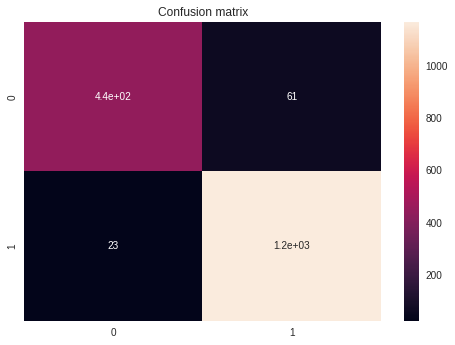

In [541]:
clf = svm.SVC(class_weight = 'balanced')
clf.fit(Xtrain, ytrain)
trpred = clf.predict(Xtrain)
tpred = clf.predict(Xtest)
accuracy(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.92      0.78      0.85       502
           1       0.91      0.97      0.94      1189

    accuracy                           0.92      1691
   macro avg       0.92      0.88      0.89      1691
weighted avg       0.92      0.92      0.91      1691
 |


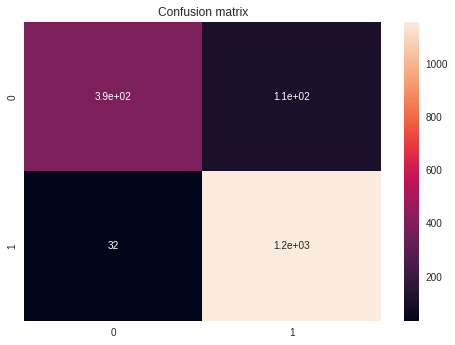

In [542]:
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
trpred = mnb.predict(Xtrain)
tpred = mnb.predict(Xtest)
accuracy(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       1.00      0.92      0.96       502
           1       0.97      1.00      0.98      1189

    accuracy                           0.98      1691
   macro avg       0.98      0.96      0.97      1691
weighted avg       0.98      0.98      0.97      1691
 |
------------------------------------------------------------------------------|


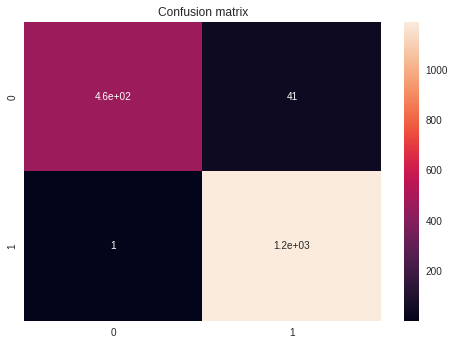

In [533]:
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
trpred = dtc.predict(Xtrain)
tpred = dtc.predict(Xtest)
accuracy(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.99      0.31      0.48       502
           1       0.78      1.00      0.87      1189

    accuracy                           0.80      1691
   macro avg       0.88      0.66      0.68      1691
weighted avg       0.84      0.80      0.76      1691
 |


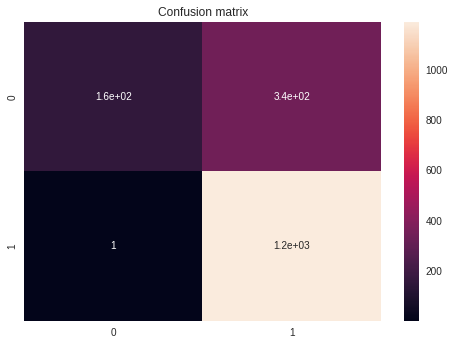

In [543]:
rfc = RandomForestClassifier(n_jobs = -1, max_depth = 10, n_estimators = 50)
rfc.fit(Xtrain, ytrain)
trpred = rfc.predict(Xtrain)
tpred = rfc.predict(Xtest)
accuracy(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

#As we see decision tree model is giving 97% accuracy more than all the algorithms